In [1]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

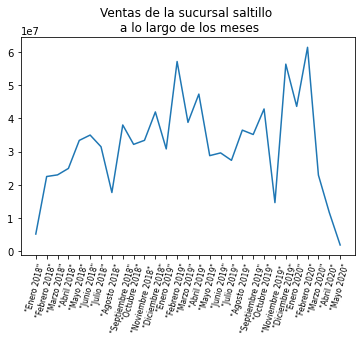

In [11]:
datos = pd.read_csv('consulta1.csv')
datos
plt.plot(datos.mes_desc,datos.venta_total)
plt.title('Ventas de la sucursal saltillo \n a lo largo de los meses')
plt.xticks(rotation=75, size=7.5)
plt.show()

In [44]:
ses = ExponentialSmoothing(datos.venta_total.values,seasonal_periods=12,seasonal='add').fit()
ses_p = ses.forecast(7)
meses_restantes = ['Junio 2020', 'Julio 2020', 'Agosto 2020', 
                   'Septiembre 2020', 'Octubre 2020', 'Noviembre 2020',
                  'Diciembre 2020']
predicciones = {mes:ventas for mes, ventas in zip(datos.mes_desc,datos.venta_total)}
for mes in meses_restantes:
    predicciones[mes]= None
    
predicciones_restantes = {}
predicciones_restantes[' "Mayo 2020"'] = datos.venta_total.values[-1]
predicciones_restantes.update({mes:ventas for mes,ventas in zip(meses_restantes,ses_p)})


Se espera que en lo que resta del año se venda:
     Junio 2020 : 19421309.38035361
     Julio 2020 : 19552919.80697858
    Agosto 2020 : 25698497.732875064
Septiembre 2020 : 26620289.19918488
   Octubre 2020 : 33220693.2112957
 Noviembre 2020 : 10365661.0898431
 Diciembre 2020 : 49280138.46208835


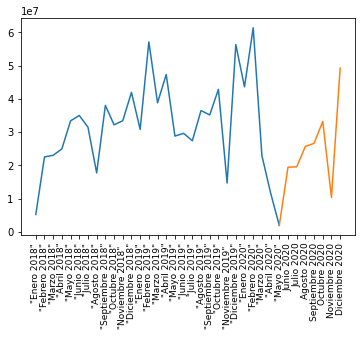

In [51]:
print('Se espera que en lo que resta del año se venda:')
for mes in meses_restantes:
    print(f'{mes:>15} : {predicciones_restantes[mes]}')
plt.plot(predicciones.keys(),predicciones.values())
plt.plot(predicciones_restantes.keys(),predicciones_restantes.values())
plt.xticks(rotation=90,size=9)
plt.show()